# Exploratory Data Analysis on Movies Dataset

### Importing the necessary libraries 

In [54]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from datetime import datetime
pd.set_option("display.max_Columns", None)

In [55]:
data = pd.read_csv("movies.csv")
df = data.copy()

### Reading and taking a copy of the dataset

In [56]:
df = pd.read_csv("movies.csv")
df.head()

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords
0,675353,Sonic the Hedgehog 2,Action-Science Fiction-Comedy-Family-Adventure,en,After settling in Green Hills Sonic is eager t...,6852.303,SEGA-Original Film-Blur Studios-Marza Animatio...,30-03-2022,110000000,355200000,122.0,Released,Welcome to the next level.,7.7,1465,Ben Schwartz-Idris Elba-Colleen O'Shaughnessey...,sequel-based on video game-hedgehog-live actio...
1,752623,The Lost City,Action-Adventure-Comedy-Romance,en,A reclusive romance novelist who was sure noth...,5805.799,Paramount-Fortis Films-3dot Productions-Exhibi...,24-03-2022,74000000,164289828,112.0,Released,The adventure is real. The heroes are not.,6.7,604,Sandra Bullock-Channing Tatum-Daniel Radcliffe...,duringcreditsstinger
2,335787,Uncharted,Action-Adventure,en,A young street-smart Nathan Drake and his wise...,3581.549,Columbia Pictures-Atlas Entertainment-PlayStat...,10-02-2022,120000000,395124202,116.0,Released,Fortune favors the bold.,7.2,1981,Tom Holland-Mark Wahlberg-Sophia Ali-Tati Gabr...,treasure-treasure hunt-based on video game
3,639933,The Northman,Action-Adventure-Drama-Fantasy-Thriller,en,Prince Amleth is on the verge of becoming a ma...,3451.658,New Regency Pictures-Focus Features-Perfect Wo...,07-04-2022,70000000,58120000,137.0,Released,Conquer your fate.,7.6,926,Alexander Skarsgård-Nicole Kidman-Claes Bang-E...,sword-father murder-prince-iceland-viking-nort...
4,414906,The Batman,Crime-Mystery-Thriller,en,In his second year of fighting crime Batman un...,3419.546,6th & Idaho-Dylan Clark Productions-DC Films-W...,01-03-2022,185000000,768442517,176.0,Released,Unmask the truth.,7.8,4637,Robert Pattinson-Zoë Kravitz-Paul Dano-Jeffrey...,crime fighter-secret identity-nightclub-politi...


#### Checking the for null values in the dataset

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780113 entries, 0 to 780112
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    780113 non-null  int64  
 1   title                 780109 non-null  object 
 2   genres                549671 non-null  object 
 3   original_language     780113 non-null  object 
 4   overview              653411 non-null  object 
 5   popularity            780113 non-null  float64
 6   production_companies  364964 non-null  object 
 7   release_date          717304 non-null  object 
 8   budget                780113 non-null  int64  
 9   revenue               780113 non-null  int64  
 10  runtime               738484 non-null  float64
 11  status                780113 non-null  object 
 12  tagline               116972 non-null  object 
 13  vote_average          780113 non-null  float64
 14  vote_count            780113 non-null  int64  
 15  

In [58]:
df.shape

(780113, 17)

### Missivalues in the dataset

In [59]:
df.isna().sum()

id                           0
title                        4
genres                  230442
original_language            0
overview                126702
popularity                   0
production_companies    415149
release_date             62809
budget                       0
revenue                      0
runtime                  41629
status                       0
tagline                 663141
vote_average                 0
vote_count                   0
credits                 237899
keywords                552009
dtype: int64

### visualizing the missing values 

<AxesSubplot:>

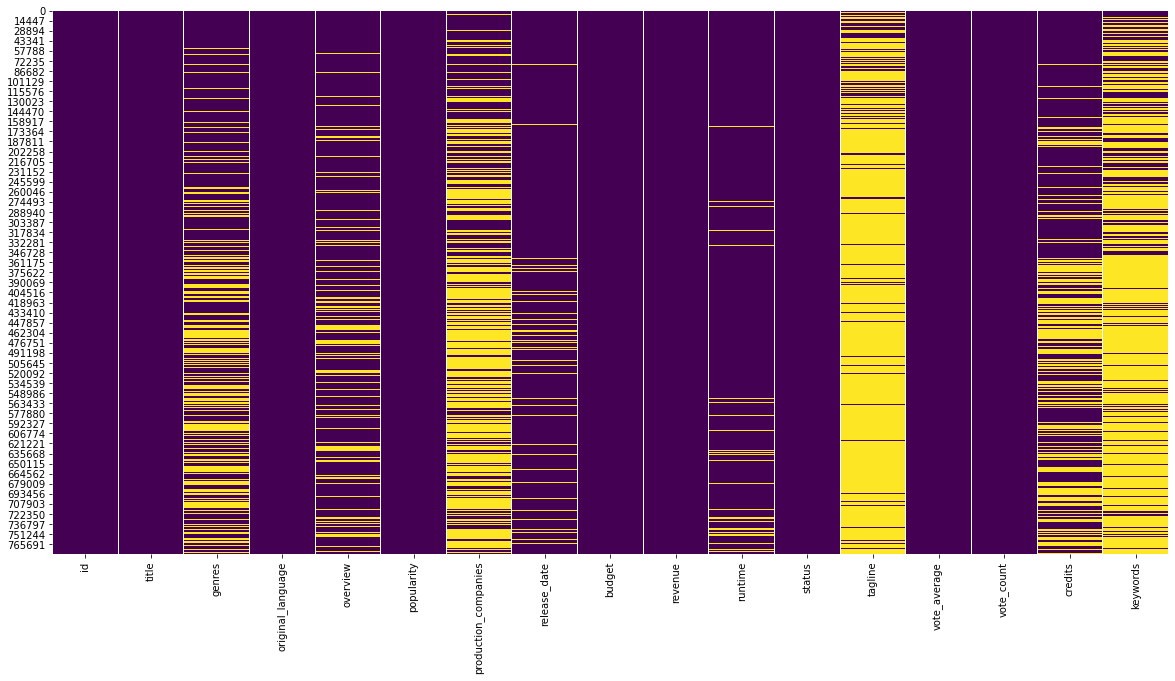

In [60]:
fig = plt.figure(figsize=(20,10))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

## Inference : The infernce from the above heatmap is that the yellow lines are the missing values in the data set.

In [61]:
df['release_date'] = pd.to_datetime(df['release_date']) # converting the date to datetime format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780113 entries, 0 to 780112
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    780113 non-null  int64         
 1   title                 780109 non-null  object        
 2   genres                549671 non-null  object        
 3   original_language     780113 non-null  object        
 4   overview              653411 non-null  object        
 5   popularity            780113 non-null  float64       
 6   production_companies  364964 non-null  object        
 7   release_date          717304 non-null  datetime64[ns]
 8   budget                780113 non-null  int64         
 9   revenue               780113 non-null  int64         
 10  runtime               738484 non-null  float64       
 11  status                780113 non-null  object        
 12  tagline               116972 non-null  object        
 13 

In [62]:
df.columns

Index(['id', 'title', 'genres', 'original_language', 'overview', 'popularity',
       'production_companies', 'release_date', 'budget', 'revenue', 'runtime',
       'status', 'tagline', 'vote_average', 'vote_count', 'credits',
       'keywords'],
      dtype='object')

In [63]:
df[df["vote_count"] == 0]["vote_average"].value_counts(normalize=True)* 100 # showa the percentage of movies with 0 votes but with voting average % 

0.0     99.958557
2.0      0.012545
1.0      0.006944
6.0      0.005824
7.0      0.003584
8.0      0.002464
5.0      0.002464
4.0      0.002016
10.0     0.001792
9.0      0.001344
3.0      0.001344
6.5      0.000672
5.5      0.000448
Name: vote_average, dtype: float64

### Infernce : For vote count having zero (i.e no number of votes) for the movies how can it have a vote_average. so the 185 records are also considered as outliers.

In [64]:
df[(df["vote_count"] == 0) & (df["vote_average"] >0)]

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords
27060,502490,Lolita per sempre,Drama,it,Photographer Cosmo a great provincial seducer ...,7.039,NaN,1991-02-02,0,0,73.0,Released,NaN,2.0,0,Petra Scharbach-Moris Brocci,erotic movie
49422,937127,How Did We Get Here?,Documentary,en,HOW DID WE GET HERE? is an intimate reflection...,4.264,Real Good Touring-Moment House-Shout! Factory,2022-02-28,0,0,83.0,Released,Let’s Go All the Way Back to the Very Beginning,10.0,0,Seán McLoughlin-Brent Lilley-Justin Tracey-JP ...,fame-gamer-youtube-social documentary-on tour-...
56049,937127,How Did We Get Here?,Documentary,en,HOW DID WE GET HERE? is an intimate reflection...,3.830,Real Good Touring-Moment House-Shout! Factory,2022-02-28,0,0,83.0,Released,Let’s Go All the Way Back to the Very Beginning,10.0,0,Seán McLoughlin-Brent Lilley-Justin Tracey-JP ...,fame-gamer-youtube-social documentary-on tour-...
63596,321740,Breeding Farm,Horror-TV Movie,en,After a night of partying four friends are kid...,3.442,Principalities Of Darkness,2013-01-13,0,0,85.0,Released,Stock Don't Talk.,2.0,0,Kerri Taylor-Melissa Constant-Angelina Leigh-E...,based on true story
64168,692436,Darkness Waits,Crime-Thriller-Horror-Mystery-Comedy,en,Five college students embark on a paranormal i...,3.416,Libmatic Films,2020-03-18,0,0,100.0,Released,When the righteous seek justice.,5.0,0,Waylon K. Smith-Emily Whitcomb-Scott Schiaffo-...,sheriff-pennsylvania usa-darkness-horror-thril...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758444,551376,Sei Jukujo,NaN,ja,1988 film.,0.600,Nikkatsu Corporation-Rolling 21,1988-09-04,0,0,62.0,Released,NaN,2.0,0,Masumi Itsuki-Marino Fujisawa-Koichi Ueda-Shir...,NaN
761697,552956,Deep Cuts,Drama,hr,The thematic framework of the anthology featur...,0.600,Kinematograf,2018-07-15,0,0,75.0,Released,NaN,8.0,0,Živko Anočić-Lily Antić-Lana Barić-Milivoj Bea...,NaN
762035,540318,Une petite femme dans le train,NaN,fr,Sophisticated romantic comedy of suspicious hu...,0.600,NaN,1932-09-30,0,0,90.0,Released,NaN,1.0,0,Henri Garat-Meg Lemonnier-Léon Belières-Pierre...,NaN
764281,504936,Belle,NaN,nl,A woman lives her life struggling against her ...,0.600,NaN,1993-04-02,0,0,99.0,Released,NaN,1.0,0,Wivineke van Groningen-Nelleke Zitman-Rosa Her...,NaN


In [65]:
df[(df["status"] == "Canceled")] ["popularity"] # show the popularity of movies that are canceled

1202      74.837
18226      9.233
71502      3.121
86320      2.655
89774      2.566
           ...  
761809     0.600
764349     0.600
770754     0.600
777887     0.600
778064     0.600
Name: popularity, Length: 192, dtype: float64

In [66]:
# sepearate the date into year, month, day, day_name
df["year"] = df["release_date"].dt.year
df['month'] = df["release_date"].dt.month
df['day'] = df["release_date"].dt.day
df["weekday_name"] = df["release_date"].dt.day_name()


In [16]:
# change the weekday_name to a categorical variable
df["weekday_name"] = df["weekday_name"].astype("category")

In [17]:
df.head()

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,year,month,day,weekday_name
0,675353,Sonic the Hedgehog 2,Action-Science Fiction-Comedy-Family-Adventure,en,After settling in Green Hills Sonic is eager t...,6852.303,SEGA-Original Film-Blur Studios-Marza Animatio...,2022-03-30,110000000,355200000,122.0,Released,Welcome to the next level.,7.7,1465,Ben Schwartz-Idris Elba-Colleen O'Shaughnessey...,sequel-based on video game-hedgehog-live actio...,2022.0,3.0,30.0,Wednesday
1,752623,The Lost City,Action-Adventure-Comedy-Romance,en,A reclusive romance novelist who was sure noth...,5805.799,Paramount-Fortis Films-3dot Productions-Exhibi...,2022-03-24,74000000,164289828,112.0,Released,The adventure is real. The heroes are not.,6.7,604,Sandra Bullock-Channing Tatum-Daniel Radcliffe...,duringcreditsstinger,2022.0,3.0,24.0,Thursday
2,335787,Uncharted,Action-Adventure,en,A young street-smart Nathan Drake and his wise...,3581.549,Columbia Pictures-Atlas Entertainment-PlayStat...,2022-10-02,120000000,395124202,116.0,Released,Fortune favors the bold.,7.2,1981,Tom Holland-Mark Wahlberg-Sophia Ali-Tati Gabr...,treasure-treasure hunt-based on video game,2022.0,10.0,2.0,Sunday
3,639933,The Northman,Action-Adventure-Drama-Fantasy-Thriller,en,Prince Amleth is on the verge of becoming a ma...,3451.658,New Regency Pictures-Focus Features-Perfect Wo...,2022-07-04,70000000,58120000,137.0,Released,Conquer your fate.,7.6,926,Alexander Skarsgård-Nicole Kidman-Claes Bang-E...,sword-father murder-prince-iceland-viking-nort...,2022.0,7.0,4.0,Monday
4,414906,The Batman,Crime-Mystery-Thriller,en,In his second year of fighting crime Batman un...,3419.546,6th & Idaho-Dylan Clark Productions-DC Films-W...,2022-01-03,185000000,768442517,176.0,Released,Unmask the truth.,7.8,4637,Robert Pattinson-Zoë Kravitz-Paul Dano-Jeffrey...,crime fighter-secret identity-nightclub-politi...,2022.0,1.0,3.0,Monday


In [18]:
# created a column profit that is the difference between the budget and the revenue
df["profit/loss"] = df["revenue"] - df["budget"]
df.head()

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,year,month,day,weekday_name,profit/loss
0,675353,Sonic the Hedgehog 2,Action-Science Fiction-Comedy-Family-Adventure,en,After settling in Green Hills Sonic is eager t...,6852.303,SEGA-Original Film-Blur Studios-Marza Animatio...,2022-03-30,110000000,355200000,122.0,Released,Welcome to the next level.,7.7,1465,Ben Schwartz-Idris Elba-Colleen O'Shaughnessey...,sequel-based on video game-hedgehog-live actio...,2022.0,3.0,30.0,Wednesday,245200000
1,752623,The Lost City,Action-Adventure-Comedy-Romance,en,A reclusive romance novelist who was sure noth...,5805.799,Paramount-Fortis Films-3dot Productions-Exhibi...,2022-03-24,74000000,164289828,112.0,Released,The adventure is real. The heroes are not.,6.7,604,Sandra Bullock-Channing Tatum-Daniel Radcliffe...,duringcreditsstinger,2022.0,3.0,24.0,Thursday,90289828
2,335787,Uncharted,Action-Adventure,en,A young street-smart Nathan Drake and his wise...,3581.549,Columbia Pictures-Atlas Entertainment-PlayStat...,2022-10-02,120000000,395124202,116.0,Released,Fortune favors the bold.,7.2,1981,Tom Holland-Mark Wahlberg-Sophia Ali-Tati Gabr...,treasure-treasure hunt-based on video game,2022.0,10.0,2.0,Sunday,275124202
3,639933,The Northman,Action-Adventure-Drama-Fantasy-Thriller,en,Prince Amleth is on the verge of becoming a ma...,3451.658,New Regency Pictures-Focus Features-Perfect Wo...,2022-07-04,70000000,58120000,137.0,Released,Conquer your fate.,7.6,926,Alexander Skarsgård-Nicole Kidman-Claes Bang-E...,sword-father murder-prince-iceland-viking-nort...,2022.0,7.0,4.0,Monday,-11880000
4,414906,The Batman,Crime-Mystery-Thriller,en,In his second year of fighting crime Batman un...,3419.546,6th & Idaho-Dylan Clark Productions-DC Films-W...,2022-01-03,185000000,768442517,176.0,Released,Unmask the truth.,7.8,4637,Robert Pattinson-Zoë Kravitz-Paul Dano-Jeffrey...,crime fighter-secret identity-nightclub-politi...,2022.0,1.0,3.0,Monday,583442517


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780113 entries, 0 to 780112
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    780113 non-null  int64         
 1   title                 780109 non-null  object        
 2   genres                549671 non-null  object        
 3   original_language     780113 non-null  object        
 4   overview              653411 non-null  object        
 5   popularity            780113 non-null  float64       
 6   production_companies  364964 non-null  object        
 7   release_date          717304 non-null  datetime64[ns]
 8   budget                780113 non-null  int64         
 9   revenue               780113 non-null  int64         
 10  runtime               738484 non-null  float64       
 11  status                780113 non-null  object        
 12  tagline               116972 non-null  object        
 13 

## univariate analysis

<AxesSubplot:xlabel='original_language', ylabel='count'>

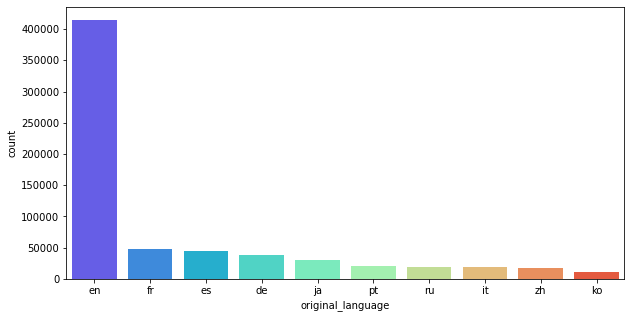

In [69]:
#  count plot for the number of top 10 original_language
fig = plt.figure(figsize = (10,5))
sns.countplot(x = "original_language", data = df, palette = "rainbow", order = df["original_language"].value_counts().index[:10])

### Inference : The above graph shows that count of english (en) movies is very much higher when compared to other language movies. 

<AxesSubplot:xlabel='genres', ylabel='count'>

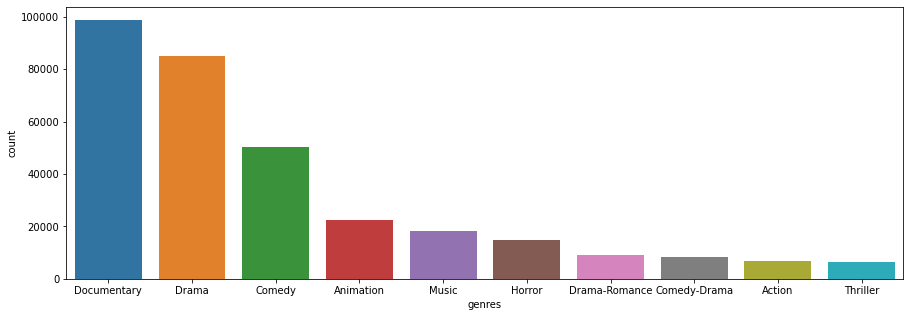

In [23]:
# count plot for the number of top 10 genres
fig = plt.figure(figsize = (15,5))
sns.countplot(x = "genres", data = df, order = df["genres"].value_counts().head(10).index)

### Infernece : The above graph shows that the top 10 genres of all the movies in which documentary , drama , comedy are the top 3 genres of movies

In [70]:
df['status'].value_counts() # shows the count of the status of the movies

Released           770374
Planned              3357
In Production        3356
Post Production      2648
Canceled              192
Rumored               186
Name: status, dtype: int64

<AxesSubplot:xlabel='weekday_name', ylabel='count'>

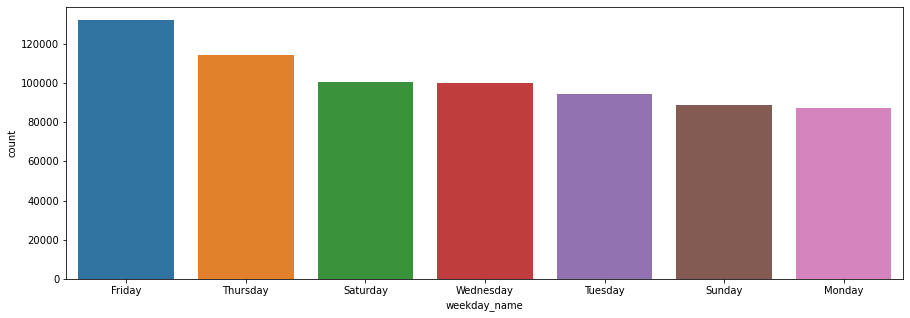

In [25]:
fig = plt.figure(figsize = (15,5))
sns.countplot(x = "weekday_name", data = df, order = df["weekday_name"].value_counts().index)

### This graph provides the information of on which weekdays the movies counts were higher 

## Bivariate Analysis

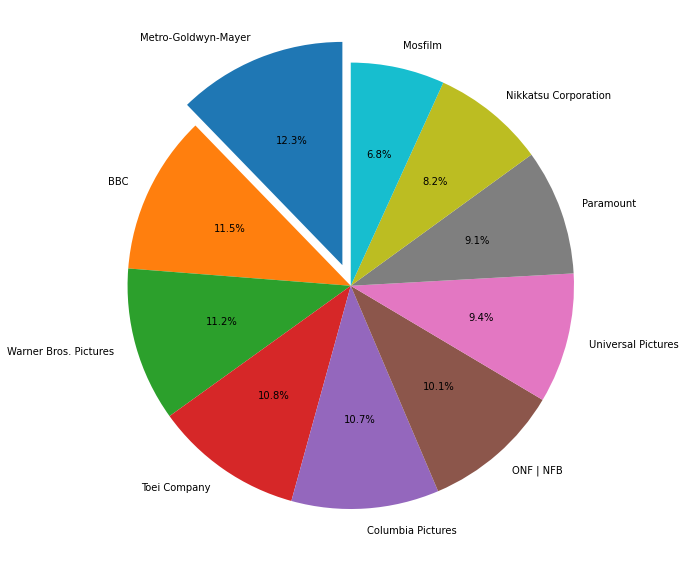

In [26]:
fig = plt.figure(figsize = (10,15))
plt.pie(x = df["production_companies"].value_counts().head(10) ,startangle = 90 , explode= (0.1,0,0,0,0,0,0,0,0,0), labels = df["production_companies"].value_counts().head(10).index, autopct = "%1.1f%%")
plt.show()

### The above pie chart shows that the top 10 production company made how much of movies in percentage

<AxesSubplot:xlabel='status', ylabel='popularity'>

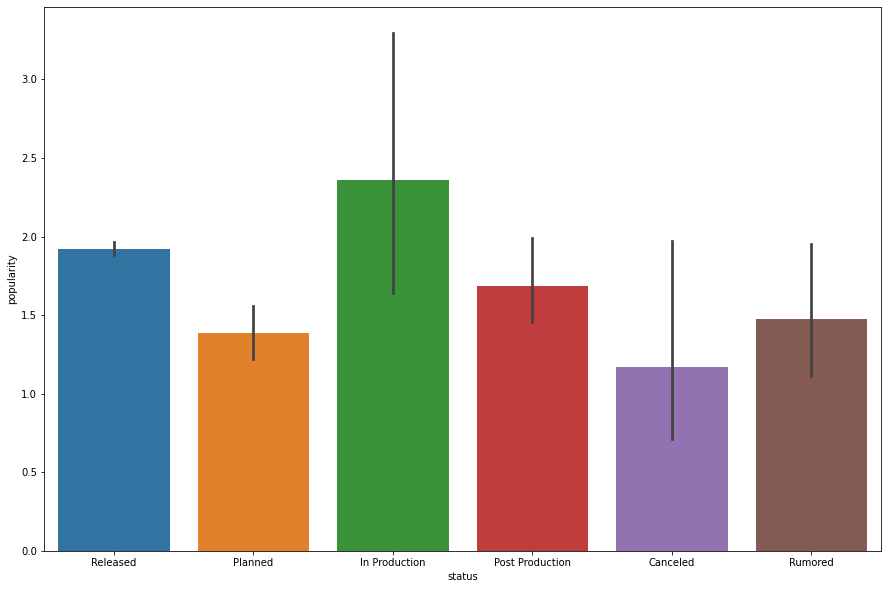

In [27]:
# bar plot for the number of top status
fig = plt.figure(figsize = (15,10))
sns.barplot(x = "status", y = "popularity", data = df, order = df["status"].value_counts().index)

### The above graph shows that on what staus of the movie the popularity of the movie was high. This shows that "In - Production " movie status had the more popularity than the released.

<Figure size 1440x1440 with 0 Axes>

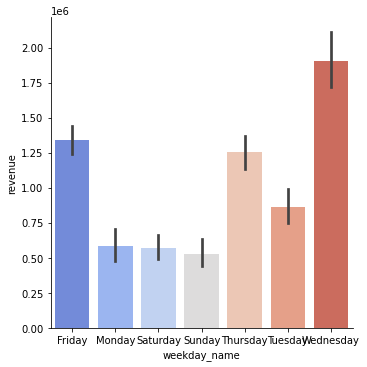

In [28]:
plt.figure(figsize = (20,20))
sns.catplot(x = "weekday_name", y = "revenue", data = df, kind = "bar", palette = "coolwarm")

### The above graph shows that on which week days the total revenue of the movies were higher.

<AxesSubplot:xlabel='runtime', ylabel='popularity'>

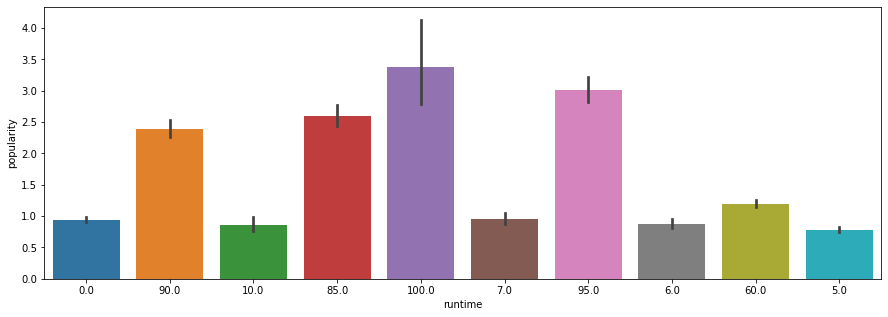

In [71]:
fig = plt.figure(figsize = (15,5))
sns.barplot(x = "runtime", y = "popularity", data = df, order = df["runtime"].value_counts().head(10).index)

### The above graph shows that the information about the movie run time with the popularity of the movie

### Selecting the top 10 production companies

In [30]:
top_10_prod_companies = list(df['production_companies'].value_counts().index[:10])
values  = df['production_companies'].value_counts().head(10)
values

Metro-Goldwyn-Mayer      2122
BBC                      1994
Warner Bros. Pictures    1933
Toei Company             1869
Columbia Pictures        1851
ONF | NFB                1743
Universal Pictures       1632
Paramount                1578
Nikkatsu Corporation     1421
Mosfilm                  1178
Name: production_companies, dtype: int64

### The below graph shows that the revenue made by the top 10 production companies. This shows that the top 7th production company made bigger profit when compared to other top production companies

<AxesSubplot:xlabel='revenue', ylabel='production_companies'>

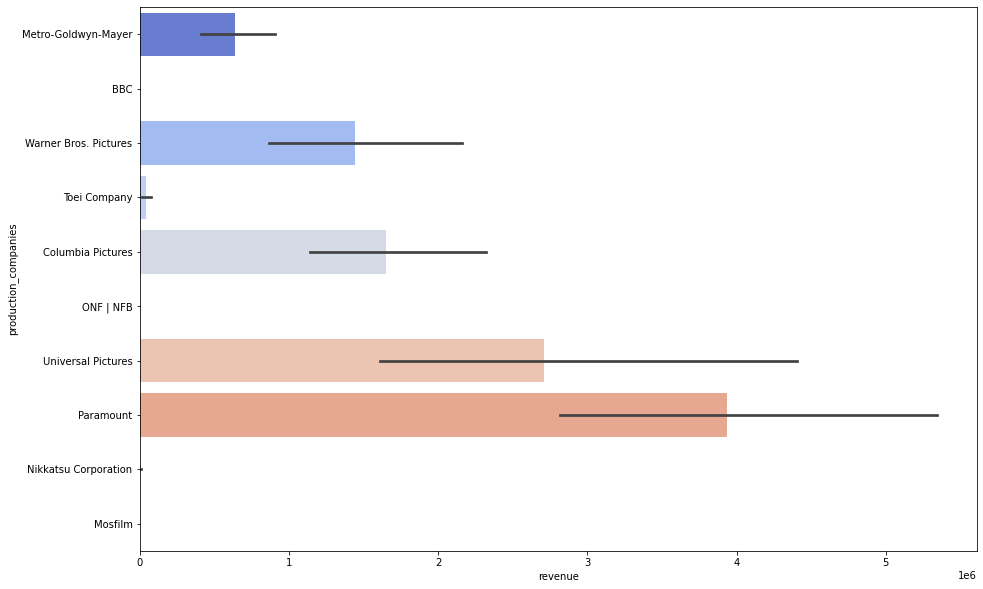

In [31]:
fig = plt.figure(figsize = (15,10))
sns.barplot(y = "production_companies", x = "revenue", data = df, order = top_10_prod_companies , palette = "coolwarm")

In [33]:
p = df.groupby("production_companies")["profit/loss"].sum().sort_values(ascending = False).head(10).reset_index(drop= False)

p

,production_companies,profit/loss
0,Marvel Studios,17479301347
1,Pixar-Walt Disney Pictures,5331959234
2,Walt Disney Pictures-Walt Disney Animation Stu...,4559013113
3,DreamWorks Animation,4508506139
4,Paramount,4341163016
5,Warner Bros. Pictures-Heyday Films,4022344923
6,Lucasfilm-20th Century Fox,3893229270
7,Walt Disney Pictures-Pixar,3847088923
8,Illumination Entertainment-Universal Pictures,3835678630
9,Blue Sky Studios-20th Century Fox Animation-20...,3788267303


<AxesSubplot:xlabel='profit/loss', ylabel='production_companies'>

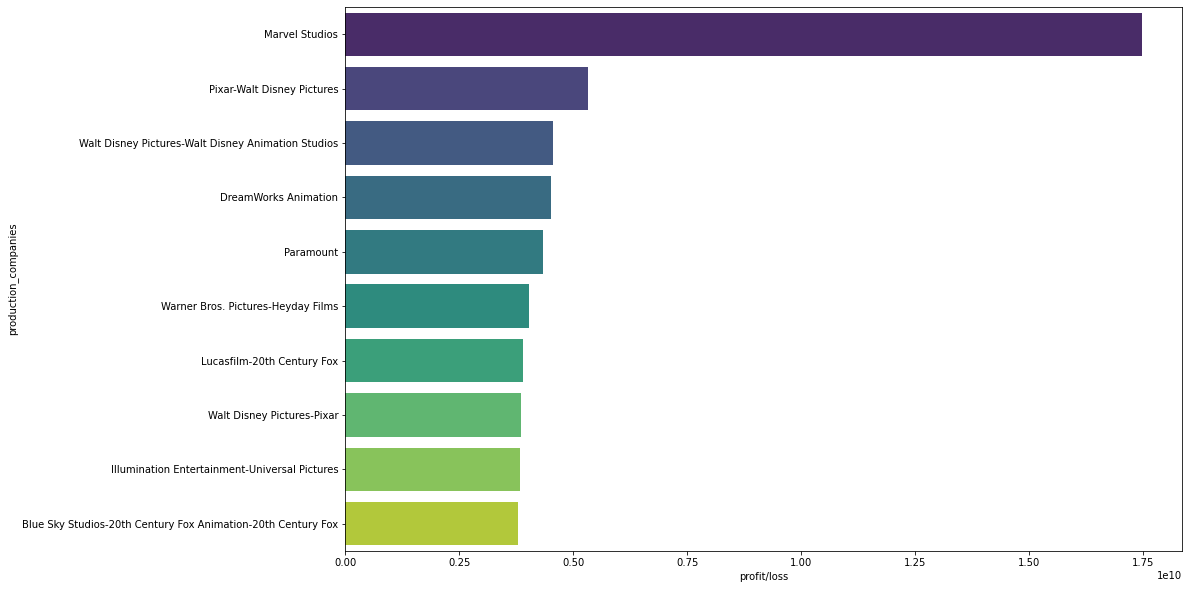

In [34]:
fig = plt.figure(figsize = (15,10))
sns.barplot(y =p["production_companies"], x= p["profit/loss"], palette = "viridis")

### The above graph shows that the marvel studios production company made high profit compared to other production companies

## Multi variate Analysis

<Figure size 1080x360 with 0 Axes>

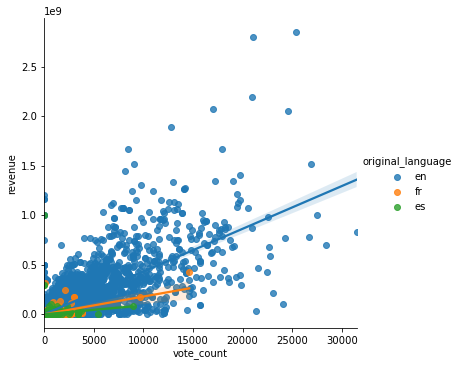

In [35]:
h = df["original_language"].value_counts().head(3).index
fig = plt.figure(figsize = (15,5))
sns.lmplot(x = "vote_count", y = "revenue", data = df, hue = "original_language", fit_reg = True, hue_order = h)

### The above graph shows an increasing tred over the vote count when compared to revenue on the top 3 languges of the movies

In [37]:
df_corr = df[['popularity', 'budget', 'revenue', 'vote_average', 'vote_count', 'runtime', 'profit/loss']].corr()

<AxesSubplot:>

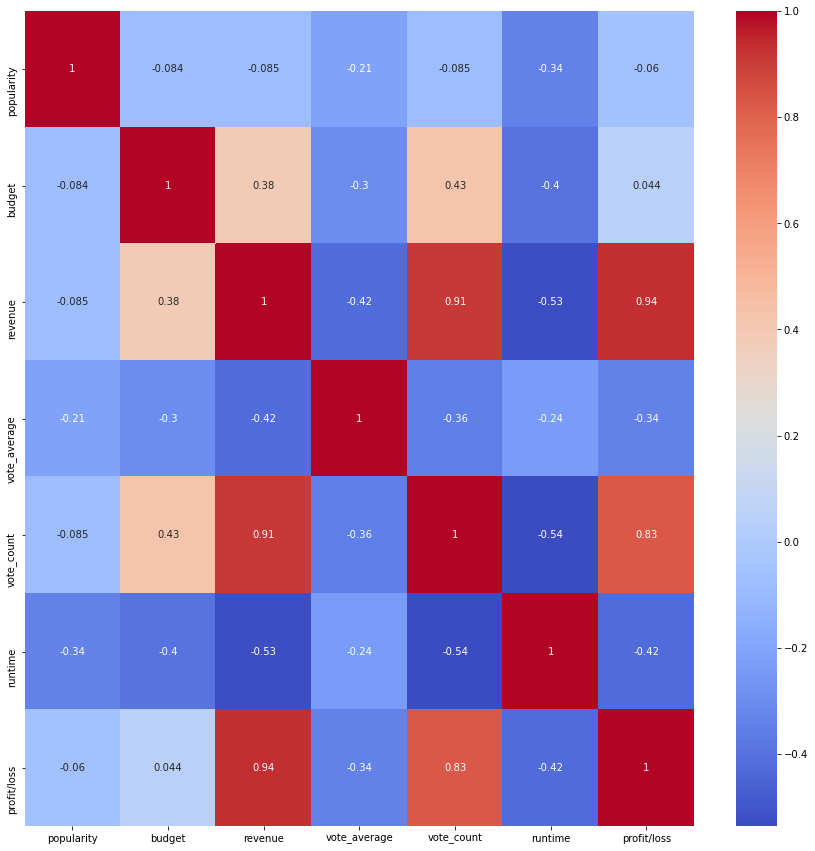

In [38]:
Fig = plt.figure(figsize = (15,15))
sns.heatmap(df_corr.corr() , annot = True, cmap = "coolwarm")

#### The above map shows the corelation between numeric variables of the dataset. This shows that vote count and revnue has high corelation.